### Import Packages and Mount drive

In [205]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Natural Gas price data

In [11]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/Nat_Gas.csv')

In [20]:
data.dtypes

Dates      object
Prices    float64
dtype: object

## Data cleaning & transformation

In [70]:
data['Dates'] = pd.to_datetime(data['Dates'], format='%Y-%m')
data['year'] = data['Dates'].dt.year
data['month'] = data['Dates'].dt.month

In [65]:
df = pd.get_dummies(data, columns = ['month'])
df['year'] = df['year'] - 2000

## EDA

(array([18628., 18809., 18993., 19174., 19358., 19539., 19723., 19905.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01'),
  Text(19905.0, 0, '2024-07')])

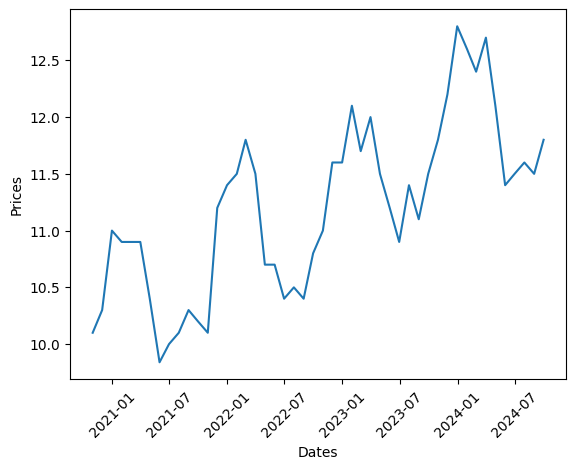

In [68]:
sns.lineplot(data, x='Dates',y='Prices')
plt.xticks(rotation=45)

## Linear regression

In [83]:
X = df.drop(['Prices','Dates'],axis=1)
Y = df['Prices']

In [182]:
df = sm.add_constant(df)
est = sm.OLS(df['Prices'],df.drop(['Prices','Dates','month_12'],axis=1))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Prices   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     62.03
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           6.25e-20
Time:                        11:27:35   Log-Likelihood:                 20.178
No. Observations:                  48   AIC:                            -14.36
Df Residuals:                      35   BIC:                             9.970
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0578      0.525      0.110      0.9

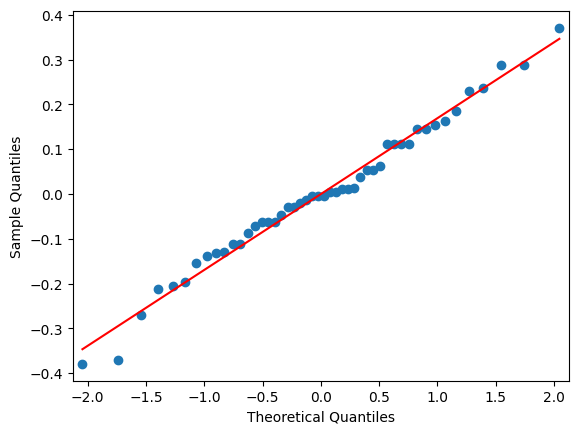

In [59]:
qqfig = sm.qqplot(est2.resid, line='r')

In [112]:
df.columns

Index(['const', 'Dates', 'Prices', 'year', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

## Predict Price

In [206]:
# save preprocessing method and apply on prediction as well
def clean(df):
  df['Dates'] = pd.to_datetime(df['Dates'], format='%Y-%m')
  df['year'] = df['Dates'].dt.year
  df['year'] = df['year'] - 2000
  df['month'] = df['Dates'].dt.month
  dummy = ['month_1', 'month_2', 'month_3', 'month_4','month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10','month_11','month_12']
  df = pd.get_dummies(df, columns = ['month'])
  dummy.remove(df.columns[2])
  df[dummy] = 0
  df = df.drop(['Dates','month_12'],axis=1)
  df = sm.add_constant(df, has_constant='add')
  return(df)

In [209]:
input = clean(pd.DataFrame({'Dates': ['2024-12-31']},columns = ['Dates', 'year']))

In [210]:
est2.predict(exog=input)

0    13.05375
dtype: float64